### 1. Load relevant libraries

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 2. Digits dataset for linear and rbf kernels of SVM

In [10]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#rbf kernel with C=1
svm_rbf = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm_pred = svm_rbf.predict(X_test)
confusion_svm_rbf = confusion_matrix(y_test, svm_pred)
#print("SVM (rbf, C=1): \n", confusion_svm_rbf)

### 3. Classification report

In [ ]:
from sklearn.metrics import classification_report
#print("Classification report: \n", classification_report(y_test, svm_pred))

### 4. Cross validation score

In [11]:
from sklearn.model_selection import cross_val_score
X, y = dataset.data, dataset.target == 1
#print('Cross-validation (accuracy)', cross_val_score(svm_rbf, X, y, cv=5))
#print('Cross-validation (AUC)', cross_val_score(svm_rbf, X, y, cv=5, scoring = 'roc_auc'))
#print('Cross-validation (recall)', cross_val_score(svm_rbf, X, y, cv=5, scoring = 'recall'))

### 5. Best Precision / Recall Scoring via GridSearchCV

In [14]:
dataset = load_digits()
X, y = dataset.data, dataset.target
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 10],
              'kernel': ['rbf']}


### 6. Precision - Recall Curve Plot

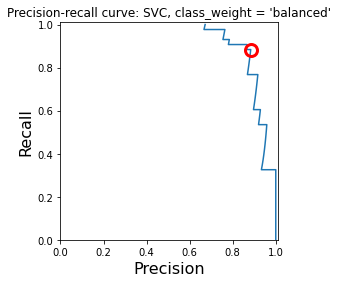

At zero threshold, precision: 0.88, recall: 0.88


In [18]:
from sklearn.metrics import precision_recall_curve
dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

clf = SVC(kernel='linear', class_weight='balanced').fit(X_train, y_train)
y_scores = clf.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))